<a href="https://colab.research.google.com/github/spacemaninSeoul/fast_campus_ML300/blob/main/ML300%EC%A0%9C_%ED%9A%8C%EA%B7%80%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Chapter 1 - 자동으로 모은 데이터는 분석하기 어렵다면서? 자동으로 모은 중고 자동차 데이터를 분석해보자!

## 데이터 소개
    - 이번 주제는 Used Cars Dataset을 사용합니다.
    - 파일은 한 개이며, 각각의 컬럼은 아래와 같습니다.
    
    - vehicles.csv
    id : 중고차 거래의 아이디
    url : 중고차 거래 페이지
    region : 해당 거래의 관리 지점
    region_url : 거래 관리 지점의 홈페이지
    price : 기입된 자동차의 거래가
    year : 거래가 기입된 년도
    manufacturer : 자동차를 생산한 회사
    model : 자동차 모델명
    condition : 자동차의 상태
    cylinders : 자동차의 기통 수
    fuel : 자동차의 연료 타입
    odometer : 자동차의 운행 마일 수
    title_status : 자동차의 타이틀 상태 (소유주 등록 상태)
    transmission : 자동차의 트랜스미션 종류
    vin : 자동차의 식별 번호 (vehicle identification number)
    drive : 자동차의 구동 타입
    size : 자동차 크기
    type : 자동차의 일반 타입 (세단, ...)
    paint_color : 자동차 색상
    image_url : 자동차 이미지
    description : 세부 설명
    county : 실수로 생성된 미사용 컬럼
    state : 거래가 업로드된 미 주
    lat : 거래가 업로드된 곳의 위도
    long : 거래가 업로드된 곳의 경도
    
    
- 데이터 출처: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

In [ ]:
# 데이터셋 준비하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 캐글 API 세팅
import os
os.environ['KAGGLE_USERNAME'] = 'fastcampuskim'
os.environ['KAGGLE_KEY'] = 'c939a1e37f5ca93b6406a66fc8bb08e5'

In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!rm *.*
!kaggle datasets download -d austinreese/craigslist-carstrucks-data
!unzip '*.zip'

rm: cannot remove '*.*': No such file or directory
 96% 251M/262M [00:03<00:00, 86.6MB/s]
100% 262M/262M [00:03<00:00, 71.7MB/s]
Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            d



In [ ]:
# csv 파일 읽기
df = pd.read_csv('vehicles.csv')

In [ ]:
# EDA 및 데이터 기초 통계 분석
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [ ]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [ ]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
df.drop(['id', 'region_url', 'VIN', 'image_url', 'description', 'state', 'lat', 'long', 'county', 'posting_date'], axis=1, inplace=True)

In [ ]:
df['age'] = 2021 - df['year']
df.drop('year', axis=1, inplace=True)

In [ ]:
df.drop('url', axis=1,inplace=True)

In [ ]:
df

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,age
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,2.0
426876,wyoming,30590,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,1.0
426877,wyoming,34990,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,1.0
426878,wyoming,28990,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,3.0


In [ ]:
# 범주형 데이터의 통계 분석
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

In [ ]:
df['manufacturer'].value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


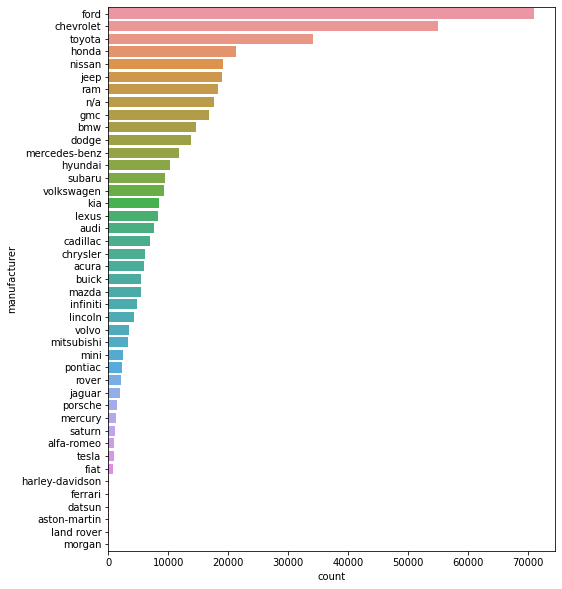

In [ ]:
fig = plt.figure(figsize=(8, 10))
sns.countplot(y='manufacturer', data = df.fillna('n/a'), order=df.fillna('n/a')['manufacturer'].value_counts().index)

In [ ]:
df.fillna('n/a')['manufacturer'].value_counts().index

Index(['ford', 'chevrolet', 'toyota', 'honda', 'nissan', 'jeep', 'ram', 'n/a',
       'gmc', 'bmw', 'dodge', 'mercedes-benz', 'hyundai', 'subaru',
       'volkswagen', 'kia', 'lexus', 'audi', 'cadillac', 'chrysler', 'acura',
       'buick', 'mazda', 'infiniti', 'lincoln', 'volvo', 'mitsubishi', 'mini',
       'pontiac', 'rover', 'jaguar', 'porsche', 'mercury', 'saturn',
       'alfa-romeo', 'tesla', 'fiat', 'harley-davidson', 'ferrari', 'datsun',
       'aston-martin', 'land rover', 'morgan'],
      dtype='object')

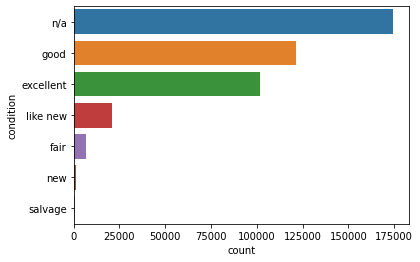

In [ ]:
sns.countplot(y='condition', data=df.fillna('n/a'), order=df.fillna('n/a')['condition'].value_counts().index)

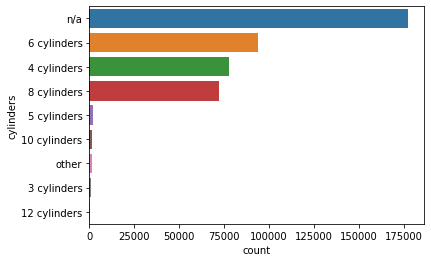

In [ ]:
sns.countplot(y='cylinders', data=df.fillna('n/a'), order=df.fillna('n/a')['cylinders'].value_counts().index)

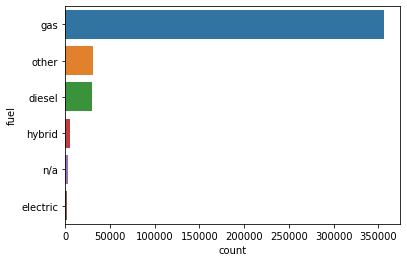

In [27]:
sns.countplot(y='fuel', data=df.fillna('n/a'), order=df.fillna('n/a')['fuel'].value_counts().index)

In [28]:
# 수치형 데이터의 통계 분석하기
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

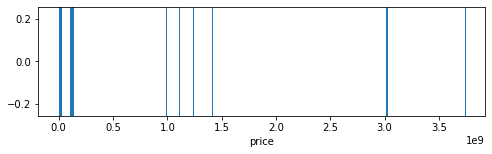

In [29]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='price', data=df, height=1)

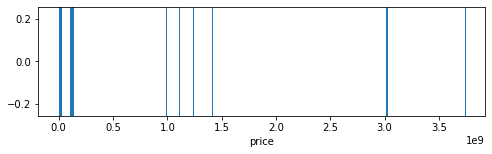

In [30]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='price', data=df, height=1)

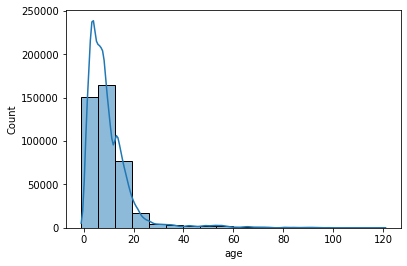

In [31]:
sns.histplot(x='age', data=df, bins=18, kde=True)